In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("heart.csv")
display(df.head(2), df.sample(2), df.tail(2))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.089109
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.997670
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,-1.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


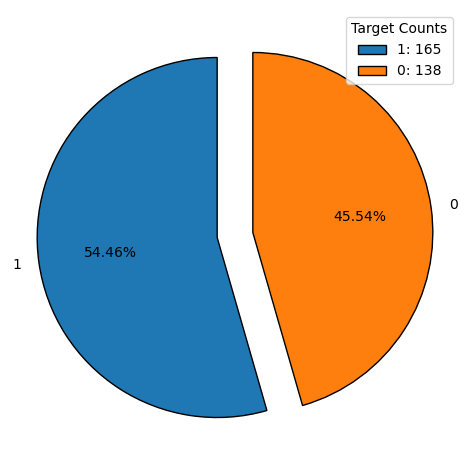

In [28]:
# Less change & More chance Sample Comparation
target_counts = df["target"].value_counts()

plt.pie(target_counts, labels=target_counts.index, autopct='%1.2f%%',  explode=(0.1, 0.1), startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

legend_labels = [f'{index}: {count}' for index, count in zip(target_counts.index, target_counts)]
plt.legend(legend_labels, title='Target Counts', loc='upper right')
plt.tight_layout()
plt.show()

In [29]:
# Encode
df['target'] = df['target'].map({0: -1, 1: 1})
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,-1
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,-1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1


In [34]:
# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop("target", axis=1)
y = df["target"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"""
X_train = {X_train.shape}
X_test = {X_test.shape}""")


X_train = (242, 13)
X_test = (61, 13)


In [36]:
X_train.to_csv("heart_X_train.csv", index=False)
X_test.to_csv("heart_X_test.csv", index=False)
y_train.to_csv("heart_y_train.csv", index=False)
y_test.to_csv("heart_y_test.csv", index=False)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8852459016393442


C:\Users\Utente\Documents\Python Projects\Optimization-Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
